# Machine Learning - Homework 6

In [ ]:
!pip install scikit-posthocs

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    cohen_kappa_score,
    roc_curve,
    roc_auc_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from scikit_posthocs import posthoc_nemenyi_friedman

## Build an R or Python program that trains a decision tree for the Wisconsin Breast Cancer

In [ ]:
def read_csv_and_analyze_dataset(path_to_csv):
  dataframe = pd.read_csv(path_to_csv)

  print("The dataset:")
  print(dataframe, end='\n\n')

  print("All the unique values for all columns that contain discrete values:")

  for column_name in dataframe:
    if not pd.api.types.is_numeric_dtype(dataframe[column_name]):
      print(f"\n{column_name}:")

      for unique_value in dataframe[column_name].unique():
        print(f"{unique_value} ({len(dataframe.loc[dataframe[column_name] == unique_value])})")

  print()

  return dataframe

In [ ]:
X = read_csv_and_analyze_dataset('breast-cancer-wisconsin.csv')
X = X.replace('?', 0)

y = X.pop(' Class')
y = y.replace(2, 0).replace(4, 1)

The dataset:
          Id   Clump Thickness   Uniformity of Cell Size  \
0    1000025                 5                         1   
1    1002945                 5                         4   
2    1015425                 3                         1   
3    1016277                 6                         8   
4    1017023                 4                         1   
..       ...               ...                       ...   
694   776715                 3                         1   
695   841769                 2                         1   
696   888820                 5                        10   
697   897471                 4                         8   
698   897471                 4                         8   

      Uniformity of Cell Shape   Marginal Adhesion  \
0                            1                   1   
1                            4                   5   
2                            1                   1   
3                            8                   1

### Conduct cross-validation by random subsampling with 30 runs

In [ ]:
repeats = 30
decision_tree_accuracies = []
svm_accuracies = []
decision_tree_f1 = []

for _ in range(0, repeats):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  decision_tree = DecisionTreeClassifier()
  svm = SVC()

  decision_tree.fit(X_train, y_train)
  svm.fit(X_train, y_train)

  y_predicted = decision_tree.predict(X_test)
  y_predicted_svm = svm.predict(X_test)

  decision_tree_accuracies.append(accuracy_score(y_test, y_predicted))
  svm_accuracies.append(accuracy_score(y_test, y_predicted_svm))
  decision_tree_f1.append(f1_score(y_test, y_predicted))


print("Accuracies: ", decision_tree_accuracies)
print("F1 scores: ", decision_tree_f1)

Accuracies:  [0.9642857142857143, 0.9642857142857143, 0.95, 0.95, 0.9071428571428571, 0.9142857142857143, 0.9428571428571428, 0.95, 0.9357142857142857, 0.9071428571428571, 0.9285714285714286, 0.95, 0.9428571428571428, 0.9642857142857143, 0.9214285714285714, 0.9714285714285714, 0.9214285714285714, 0.9642857142857143, 0.9285714285714286, 0.9071428571428571, 0.9142857142857143, 0.95, 0.9214285714285714, 0.8928571428571429, 0.9428571428571428, 0.9285714285714286, 0.95, 0.9, 0.9285714285714286, 0.9785714285714285]
F1 scores:  [0.9397590361445783, 0.9397590361445782, 0.9345794392523364, 0.9369369369369368, 0.8571428571428572, 0.8749999999999999, 0.9130434782608695, 0.9306930693069307, 0.8915662650602411, 0.8712871287128714, 0.9, 0.9213483146067417, 0.9130434782608695, 0.9523809523809523, 0.8817204301075269, 0.9636363636363636, 0.8865979381443299, 0.9473684210526316, 0.8863636363636365, 0.8602150537634409, 0.8867924528301887, 0.9320388349514563, 0.9059829059829059, 0.810126582278481, 0.902439

### Obtain mean accuracy, standard deviation, F1-score and the confusion matrix

In [ ]:
print("Accuracy: %.2f" % np.mean(decision_tree_accuracies))
print("Standard Deviation: %.2f" % np.std(decision_tree_accuracies))
print("F1 Score: %.2f" % np.mean(decision_tree_f1))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_predicted))

Accuracy: 0.94
Standard Deviation: 0.02
F1 Score: 0.91
Confusion matrix: 
[[91  1]
 [ 2 46]]


### Compute the agreement between predictions and real targets with Cohen’s k

In [ ]:
print("Cohen’s k: ", cohen_kappa_score(y_test, y_predicted))

Cohen’s k:  0.9522075557578517


### Obtain the ROC curve and the AUC value

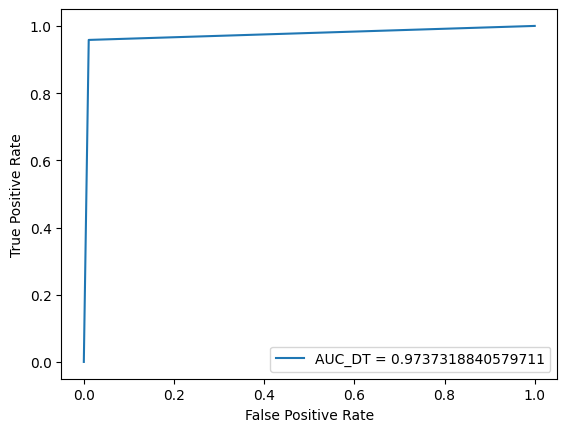

In [ ]:
y_predict_proba = decision_tree.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(y_test, y_predict_proba)
auc = roc_auc_score(y_test, y_predict_proba)

plt.plot(fpr, tpr, label=f"AUC_DT = {str(auc)}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

### Apply the Wilcoxon test to compare the prediction of the decision tree with the prediction of an SVM classifier

In [ ]:
wilcoxon(decision_tree_accuracies, svm_accuracies)

WilcoxonResult(statistic=0.0, pvalue=1.862645149230957e-09)

## Build an R or Python program that trains a decision tree for Boston housing

In [ ]:
boston_df = read_csv_and_analyze_dataset('Boston.csv')

The dataset:
     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black 

### Conduct cross-validation by random subsampling with 30 runs

In [ ]:
repeats = 30
decision_tree_mse = []
svm_mse = []

for _ in range(0, repeats):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  decision_tree = DecisionTreeRegressor()
  svm = SVC()

  decision_tree.fit(X_train, y_train)
  svm.fit(X_train, y_train)

  y_predicted = decision_tree.predict(X_test)
  y_predicted_svm = svm.predict(X_test)

  decision_tree_mse.append(mean_squared_error(y_test, y_predicted))
  svm_mse.append(mean_squared_error(y_test, y_predicted_svm))

print("MSEs: ", decision_tree_mse)

MSEs:  [0.07857142857142857, 0.05, 0.05, 0.05714285714285714, 0.1, 0.05, 0.02857142857142857, 0.05714285714285714, 0.04285714285714286, 0.08571428571428572, 0.06428571428571428, 0.04285714285714286, 0.07857142857142857, 0.06428571428571428, 0.04285714285714286, 0.09285714285714286, 0.02857142857142857, 0.07857142857142857, 0.05714285714285714, 0.09285714285714286, 0.05, 0.03571428571428571, 0.06428571428571428, 0.07142857142857142, 0.05714285714285714, 0.05714285714285714, 0.03571428571428571, 0.07857142857142857, 0.08571428571428572, 0.014285714285714285]


### Obtain MSE, RMSE, MAE, MAPE, R^2 and Adjusted R^2

In [ ]:
def r2_adjusted_score():
    samples_nr = len(X_train)
    features_nr = len(X.columns)

    return 1 - ((1 - r2) * (samples_nr - 1) / (samples_nr - features_nr - 1))

print("MSE: ", mean_squared_error(y_test, y_predicted))
print("RMSE: ", mean_squared_error(y_test, y_predicted, squared=False))
print("MAE: ", mean_absolute_error(y_test, y_predicted))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_predicted))

r2 = r2_score(y_test, y_predicted)

print("R^2: ", r2)
print("Adjusted R^2: ", r2_adjusted_score())

MSE:  0.014285714285714285
RMSE:  0.11952286093343936
MAE:  0.014285714285714285
MAPE:  32168568766932.12
R^2:  0.9404761904761905
Adjusted R^2:  0.9393899895724713


### Apply the Wilcoxon test to compare the prediction of the decision tree with the prediction of an SVM

In [ ]:
wilcoxon(decision_tree_mse, svm_mse)

WilcoxonResult(statistic=0.0, pvalue=1.862645149230957e-09)

## Construct at least 3 classifiers for the Iris, Pima and Wine data sets and try the application of Friedman’s test to rank their performance (R or Python)

In [ ]:
def transform_ordinal_columns(dataframe, column_names):
  dataframe[column_names] = OrdinalEncoder().fit_transform(
      dataframe[column_names]
  )

  return dataframe

In [ ]:
iris_X = read_csv_and_analyze_dataset('iris.csv')

# This column is not actually ordinal, but we will need to apply an 'ordinal'
# transformation to it in order to use it as 'y' in a multiclass classification
# problem
iris_X = transform_ordinal_columns(iris_X, ['variety'])

iris_y = iris_X.pop('variety')

The dataset:
     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

All the unique values for all columns that contain discrete values:

variety:
Setosa (50)
Versicolor (50)
Virginica (50)



In [ ]:
diabetes_X = read_csv_and_analyze_dataset('diabetes.csv')

diabetes_y = diabetes_X.pop('Outcome')

The dataset:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1     

In [ ]:
wine_X = read_csv_and_analyze_dataset('winequalityN.csv')

wine_X = wine_X.dropna()

# This column is not actually ordinal, but we will need to apply an 'ordinal'
# transformation to it in order to use it as 'y' in a multiclass classification
# problem
wine_X = transform_ordinal_columns(wine_X, ['type'])

wine_y = wine_X.pop('quality')

The dataset:
       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  de

In [ ]:
decision_tree_iris = DecisionTreeClassifier()
decision_tree_diabetes = DecisionTreeClassifier()
decision_tree_wine = DecisionTreeClassifier()

iris_scores = cross_val_score(decision_tree_iris, iris_X, iris_y, cv=5)
diabetes_scores = cross_val_score(
    decision_tree_diabetes,
    diabetes_X,
    diabetes_y,
    cv=5
)
wine_scores = cross_val_score(decision_tree_wine, wine_X, wine_y, cv=5)

results = [iris_scores, diabetes_scores, wine_scores]

statistic, p_value = friedmanchisquare(*results)

print("Friedman Test Statistic: ", statistic)
print("P-value: ", p_value)

if p_value <= 0.05:
    print("Null hypothesis rejected. There are significant differences in performance.")

    nemeyi_results = posthoc_nemenyi_friedman(results)

    print(f"Nemeyi test results:\n{np.array(nemeyi_results)}")
else:
    print("No significant difference in performance among the classifiers.")

Friedman Test Statistic:  10.0
P-value:  0.006737946999085468
Null hypothesis rejected. There are significant differences in performance.
Nemeyi test results:
[[1.         0.9        0.9        0.52614072 0.9       ]
 [0.9        1.         0.67267429 0.9        0.9       ]
 [0.9        0.67267429 1.         0.23518425 0.67267429]
 [0.52614072 0.9        0.23518425 1.         0.9       ]
 [0.9        0.9        0.67267429 0.9        1.        ]]
